{{ toc_libs }}

# yfinance

`````{tab-set}

````{tab-item} API
```{code-block} python
import yfinance as yf
```
````

````{tab-item} Install
```{code-block} bash
pip install yfinance --upgrade --no-cache-dir
```
````

```{tab-item} Docs
<i class="fab fa-github fa-2x"></i> https://github.com/ranaroussi/yfinance
```

```{tab-item} Data Source
Yahoo Finance: https://finance.yahoo.com
```

`````

In [1]:
import yfinance as yf

[yfinance](https://pypi.org/project/yfinance/) é uma biblioteca independente que realiza buscas na base de dados do [Yahoo Finance](https://finance.yahoo.com/).

## Yahoo URL Query

Esta seção mostra explicitamente a URL que a api da <font color='purple'> yahoo finance </font> faz a *query*.

In [2]:
    from datetime import datetime
    import urllib.request
    from io import StringIO
    import pandas as pd

<font size=2>

In [3]:
    def yahoo_query(ticker,start,end='',interval="1d"):
        if end=='': end = datetime.now().strftime("%d/%m/%Y")
        date = {
            'format':"%d/%m/%Y, %H:%M:%S",
            'start':"{}, 04:00:00".format(start),
            'end':"{}, 04:00:00".format(end)
        }
        date['start'] = int(datetime.strptime(date['start'],date['format']).timestamp())
        date['end'] = int(datetime.strptime(date['end'],date['format']).timestamp())
        
        query = "https://query1.finance.yahoo.com/v7/finance/download/"
        period = "period1={}&period2={}&interval={}&events=history&includeAdjustedClose=true".format(date['start'],date['end'],interval)
        url = "{}{}?{}".format(query,ticker,period)
        
        with urllib.request.urlopen(url) as f:
            return pd.read_csv(StringIO(f.read().decode('utf-8')),sep=",")    

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2011-05-02  0.503125  0.518750  0.503125  0.514062   0.463173  280003200
2011-05-03  0.515625  0.521562  0.506250  0.509375   0.458950   33670400
2011-05-04  0.510000  0.515000  0.510000  0.515000   0.464018   39203200
2011-05-05  0.512812  0.512812  0.510000  0.511875   0.461202   35097600
2011-05-06  0.510937  0.511875  0.500000  0.508125   0.457824   38672000


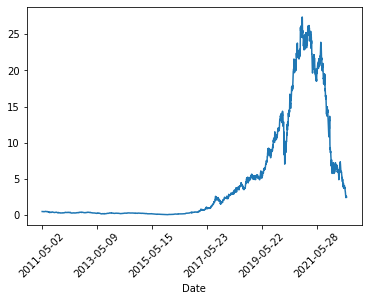

In [4]:
    magalu = yahoo_query("MGLU3.SA",start='02/05/2011')
    magalu.set_index('Date',inplace=True)
    print(magalu.head())
    magalu['Adj Close'].plot(rot=45);

</font>

## Métodos 

#### Ticker(*args, **kwargs)

O método `.Ticker()` reúne as principais informações da empresa sendo buscada.

In [5]:
    ticker = {'Coca-Cola':'KO'}
    stocks = dict()